<a href="https://colab.research.google.com/github/kindeerrrr/first_repository/blob/main/dz_5_%D0%BB%D1%83%D1%87%D1%88%D0%B8%D0%B9_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

### **Чтение и информация о датасете**

In [2]:
# Загрузка и исследование датасета
df = pd.read_csv("Physical_Activity_Monitoring_unlabeled.csv")
print("Размерность данных:", df.shape)
print("\nТипы данных:")
print(df.dtypes.value_counts())

print("\nСтатистика:")
display(df.describe())

print("\nПропуски:")
print(df.isnull().sum().sort_values(ascending=False).head())

Размерность данных: (534601, 53)

Типы данных:
float64    52
int64       1
Name: count, dtype: int64

Статистика:


,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000



Пропуски:
handTemperature    4041
handAcc16_2        4041
handAcc16_1        4041
handAcc16_3        4041
handAcc6_1         4041
dtype: int64


### **Работа с данными**

In [3]:
# Предобработка данных
# Заполнение пропусков медианой
df.fillna(df.median(), inplace=True)

# Масштабирование данных
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Сэмплируем n строк для анализа, чтобы не возникло проблем с временем загрузки
n = 30000
df_sampled = resample(df_scaled, n_samples=n, random_state=42)

# Feature Engineering: PCA для уменьшения размерности
n_comp = 20
print(f"\nPCA до {n_comp} компонент")
pca = PCA(n_components=n_comp, random_state=42)
X_reduced = pca.fit_transform(df_sampled)
print("Размерность после PCA:", X_reduced.shape)


PCA до 20 компонент
Размерность после PCA: (30000, 20)


### **Поиск оптимального k**

* Метода локтя (Elbow Method) — показывает, при каком k инерция (сумма квадратов расстояний до центров кластеров) перестаёт сильно уменьшаться.
* Силуэтного коэффициента (Silhouette Score) — оценивает, насколько хорошо разделены кластеры.

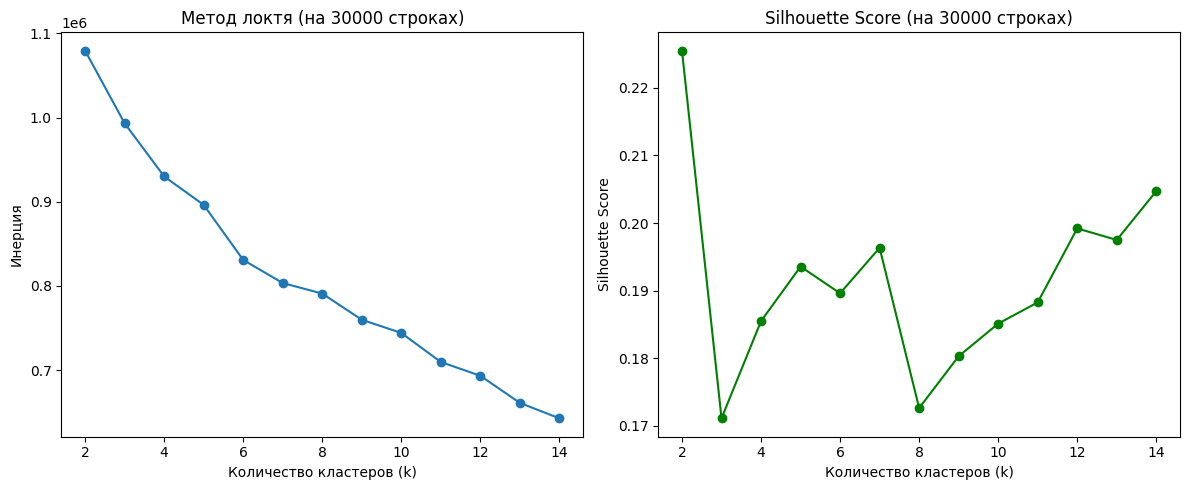

In [4]:
inertias = []
silhouette_scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_reduced)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_reduced, kmeans.labels_))

# Визуализация
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title(f'Метод локтя (на {n} строках)')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title(f'Silhouette Score (на {n} строках)')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

*	Метод локтя → k = 7 — кривая перестаёт резко снижаться
*	Silhouette Score → max при k = 2, но всего 0.23 → слабое разделение, неубедительно

В такой ситуации k = 7 — это хороший компромисс:
*	Разбиение более детальное
*	Метод локтя это подтверждает
*	Silhouette тоже не против

KMeans (k=7): silhouette score = 0.1901
Agglomerative (k=7): silhouette score = 0.1442


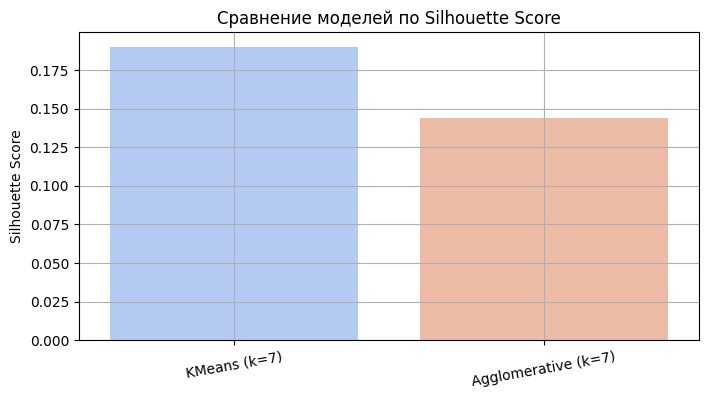

In [6]:
# Сравнение моделей кластеризации
k = 7
models = {
    f'KMeans (k={k})': KMeans(n_clusters=k, random_state=42),
    f'Agglomerative (k={k})': AgglomerativeClustering(n_clusters=k)
}

results = []

for name, model in models.items():
    labels = model.fit_predict(X_reduced)
    sil_score = silhouette_score(X_reduced, labels)
    results.append((name, sil_score))
    print(f"{name}: silhouette score = {sil_score:.4f}")

# Визуализация результатов
model_names, scores = zip(*results)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(model_names), y=list(scores), hue=list(model_names), palette="coolwarm", legend=False)
plt.title("Сравнение моделей по Silhouette Score")
plt.ylabel("Silhouette Score")
plt.xticks(rotation=10)
plt.grid(True)
plt.show()

### **Обучение и выгрузка файла**

In [7]:
# Масштабируем полностью
scaler = StandardScaler()
df_scaled_all = scaler.fit_transform(df)

# Обучаем PCA на полном наборе
pca = PCA(n_components=n_comp, random_state=42)
X_reduced_all = pca.fit_transform(df_scaled_all)

# Обучаем финальную модель на PCA-данных
final_model = KMeans(n_clusters=k, random_state=42)
# final_model = AgglomerativeClustering(n_clusters=k)
cluster_labels = final_model.fit_predict(X_reduced_all)

# Создаём DataFrame
submission = pd.DataFrame({
    "index": df.index,
    "activityID": cluster_labels
})

# Сохраняем
submission.to_csv("sample_submit.csv", index=False)

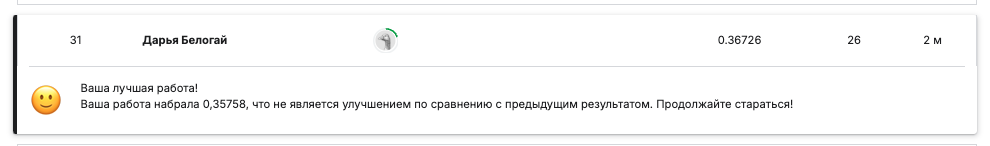